# Fig08

In [2]:
from data_import import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from plotting import *
from manual_models import *

/home/fbehrens/University/counting-attention-arxiv/manual_models.py:363: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  model.fc1.weight.data = torch.tensor(W_1).float().to(device)


Test passed, model works!
0 0.31828945875167847
0.31828945875167847 0.47135554254055023
0.47135554254055023 0.5912531763315201
0.5912531763315201 0.6877317279577255
0.6877317279577255 0.7670541405677795
0.7670541405677795 0.8334296643733978
0.8334296643733978 0.8897929042577744
0.8897929042577744 0.9382529221475124
0.9382529221475124 0.9803648330271244
0.9803648330271244 1


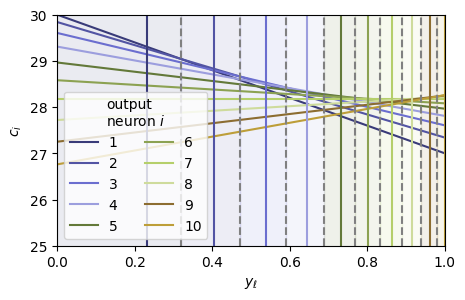

In [20]:
T = 32
L = 10

config = {
    'T': T,
    'model_dim': T,
    'p': T,
    'seq_len':L,
    'attention_input': 'only_sem',
    'no_softmax': False,
    'dataset_type': 'backward'
}
model, ws, bs, precise_values, desicion_bounds = generate_perfect_weights(config)
test(model, T , L, has_BOS = 'BOS' in config['dataset_type'])

colors = list(plt.cm.tab20b.colors)

plt.figure(figsize=(5,3))

for i, (a,b) in enumerate(zip([0] + list(desicion_bounds), list(desicion_bounds) + [1])):
  print(a,b)
  plt.axhspan(ymin=-100, ymax=100, xmin=a, xmax=b,color=colors[i],alpha=0.1)


for i in range(1,ws.shape[0]):
  w_1 = ws[i]
  b_1 = bs[i]
  x = np.linspace(0,1,100)
  y = x * w_1 + b_1
  plt.plot(x,y,label=i, c=colors[i-1])

for i, v in enumerate(precise_values):
  plt.axvline(v,c=colors[i])

for v in desicion_bounds:
  plt.axvline(v,c='grey',ls='--')


plt.legend(title='output\nneuron $i$',ncols=2)
plt.ylim(25,30)
plt.xlim(0,1)
#plt.xlabel(r'mixing weight $\alpha_{x_\ell}$')
#plt.ylabel(r"$f(\bar{x}')_c$")
plt.ylabel(r"$c_i$")
plt.xlabel(r"$y_\ell$")
plt.savefig(FIGURE_DIR / 'softmax_piecewise_linear.pdf',bbox_inches='tight')